<a href="https://colab.research.google.com/github/ParishaKB/ML/blob/master/Experiment_7/Experiment_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype, fetch_kddcup99, fetch_lfw_pairs, fetch_lfw_people, fetch_olivetti_faces
from sklearn.datasets import fetch_rcv1, load_breast_cancer, load_digits, load_wine

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [3]:
from keras import models
from keras import layers
from keras.utils import to_categorical

Fetch CupKdd99

Loading and Preprocessing the Data

In [4]:
kddcup99 = fetch_kddcup99()
x_fetch_kddcup99 = kddcup99.data
y_fetch_kddcup99 = kddcup99.target

In [5]:
x_kdd = pd.DataFrame(x_fetch_kddcup99)
y_kdd = pd.DataFrame(y_fetch_kddcup99)
print(x_kdd.shape)
print(y_kdd.shape)

(494021, 41)
(494021, 1)


In [6]:
le = LabelEncoder()
for i in [1,2,3]:
  x_kdd[i] = [j.decode('utf-8') for j in x_kdd[i]]
  x_kdd[i] = le.fit_transform(x_kdd[i])

for i in range(x_kdd.shape[1]):
  x_kdd[i] = x_kdd[i].astype('float')

In [7]:
y_kdd99 = [i.decode('utf-8') for i in y_fetch_kddcup99]
y_kdd99 = pd.DataFrame(le.fit_transform(y_kdd99))

Making A Neural Network

In [8]:
y_kdd99 = to_categorical(y_kdd99)
x_train, x_test, y_train, y_test = train_test_split(x_kdd, y_kdd99, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(395216, 41)
(49402, 41)
(49403, 41)
(395216, 23)
(49402, 23)
(49403, 23)


In [9]:
nn_kdd99 = models.Sequential()
nn_kdd99.add(layers.Dense(256, activation = 'relu', input_shape = (41, )))
nn_kdd99.add(layers.Dense(128, activation = 'relu'))
nn_kdd99.add(layers.Dense(64, activation = 'relu'))
nn_kdd99.add(layers.Dense(32, activation = 'relu'))
nn_kdd99.add(layers.Dense(23, activation = 'softmax'))
nn_kdd99.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
kdd99_history = nn_kdd99.fit(x_train, y_train, epochs = 10, batch_size = 1000, validation_data = (x_dev, y_dev))
kdd99_dev_acc = nn_kdd99.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', kdd99_dev_acc)

Epoch 1/10
396/396 [==============================] - 4s 11ms/step - loss: 140.0702 - accuracy: 0.9613 - val_loss: 6.2907 - val_accuracy: 0.9924
Epoch 2/10
396/396 [==============================] - 4s 10ms/step - loss: 74.3286 - accuracy: 0.9810 - val_loss: 3.0727 - val_accuracy: 0.9517
Epoch 3/10
396/396 [==============================] - 4s 10ms/step - loss: 183.2789 - accuracy: 0.9862 - val_loss: 1.2989 - val_accuracy: 0.9964
Epoch 4/10
396/396 [==============================] - 4s 10ms/step - loss: 47.0215 - accuracy: 0.9880 - val_loss: 1.5972 - val_accuracy: 0.9934
Epoch 5/10
396/396 [==============================] - 4s 10ms/step - loss: 15.1443 - accuracy: 0.9888 - val_loss: 0.4739 - val_accuracy: 0.9948
Epoch 6/10
396/396 [==============================] - 4s 10ms/step - loss: 1.2348 - accuracy: 0.9889 - val_loss: 1.7670 - val_accuracy: 0.9920
Epoch 7/10
396/396 [==============================] - 4s 10ms/step - loss: 0.3542 - accuracy: 0.9893 - val_loss: 0.0353 - val_accuracy:

Plotting Accuracy & Validation Accuracy with Epoch

Plotting Loss & Validation Loss with Epoch

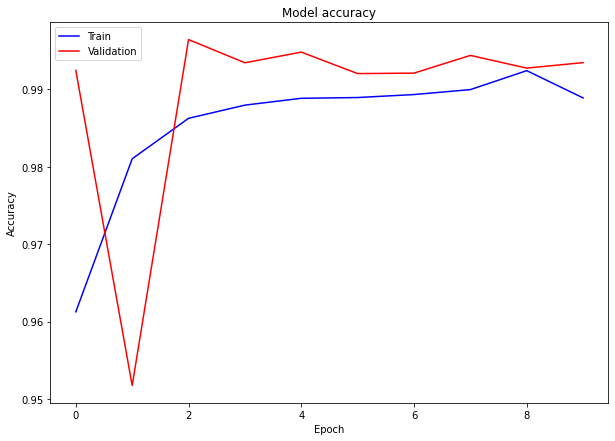

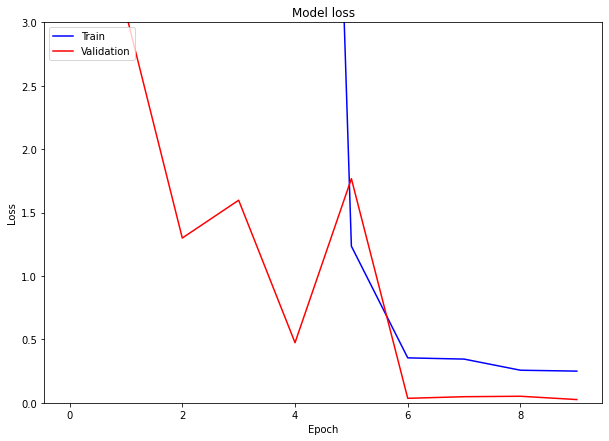

In [11]:
plt.figure(figsize = (10,7))
plt.plot(kdd99_history.history['accuracy'], color = 'blue')
plt.plot(kdd99_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(kdd99_history.history['loss'], color = 'blue')
plt.plot(kdd99_history.history['val_loss'], color = 'red')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [12]:
kdd99_test_acc = nn_kdd99.evaluate(x_test, y_test)[1]
print('The test accuracy is', kdd99_test_acc)

1544/1544 [==============================] - 1s 813us/step - loss: 0.0315 - accuracy: 0.9936
The test accuracy is 0.9935833811759949
